In [1]:
import numpy as np
from pathlib import Path
from astropy import stats
from astropy import units as u
from astropy.modeling import models, fitting

import warnings
from astropy.utils.exceptions import AstropyDeprecationWarning
warnings.simplefilter('ignore', category=AstropyDeprecationWarning)

from keckdata import KeckData, KeckDataList, fits_reader, analysis

In [2]:
## NIRES SPEC

nominal_gain = 3.8 * u.electron/u.adu
p_darks = Path('/Volumes/JOSHW/NIRES/2019nov08')
files = sorted([f for f in p_darks.glob('*.fits')])
kdl_biasesdarks = KeckDataList(files, verbose=False)
print(kdl_biasesdarks.len)

40


In [3]:
# CDS Mode
kdl_cds = KeckDataList( [kd for kd in kdl_biasesdarks.frames if kd.readout_mode() == 'CDS'] )
print(kdl_cds.len)

20


2019-11-08 16:43:28     INFO: Determining read noise
2019-11-08 16:43:28     INFO:   Checking that all inputs are BIAS frames
2019-11-08 16:43:28     INFO:   Found 20 biases
2019-11-08 16:43:28     INFO: Making master bias from 19 frames
2019-11-08 16:43:28     INFO: Making master bias for each of 1 extensions
2019-11-08 16:43:28    DEBUG:   Generating master bias for 1th extension
2019-11-08 16:43:32    DEBUG:   Determining data statistics for 1th extension
2019-11-08 16:43:33    DEBUG:   Master Bias 0 (mean, med, mode, std) = -0.0, 0.0, 0, 0.78
2019-11-08 16:43:33     INFO:   Done
2019-11-08 16:43:33     INFO:   Determining read noise for each of 1 extensions
2019-11-08 16:43:34    DEBUG:   Bias Diff (mean, med, mode, std) = 0.4, 0.3, 0, 3.47
2019-11-08 16:43:34     INFO:   Read Noise is 3.38 adu for extension 1
2019-11-08 16:43:34     INFO:   Generating plot for: s191108_0020.fits, frame 0
2019-11-08 16:43:34     INFO:   Generating read noise plot: read_noise_NIRES_SPEC_CDS_ext0.png

Read Noise (ext 0) = 12.83 electron


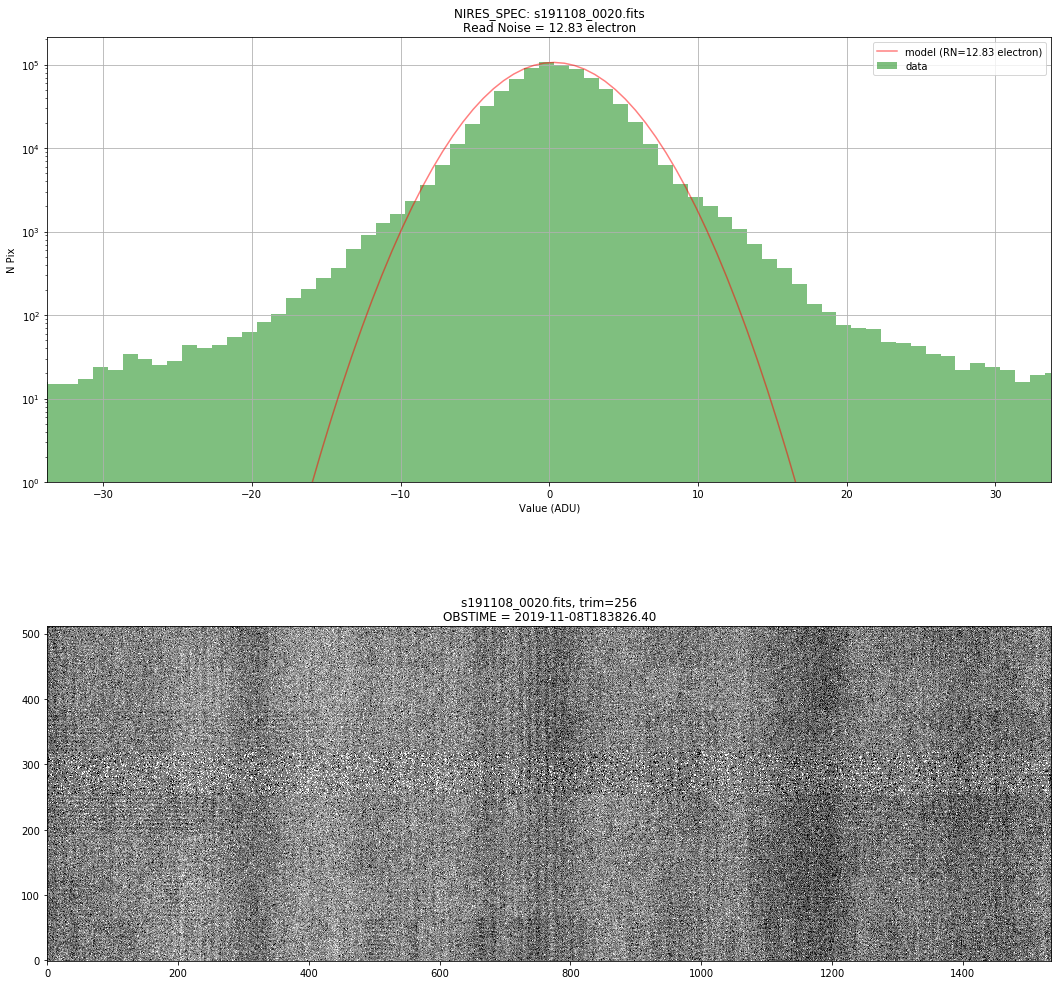

In [4]:
RNcds = analysis.determine_read_noise(kdl_cds, plot=True, trim=256, gain=nominal_gain)
for i,r in enumerate(RNcds):
    print(f"Read Noise (ext {i}) = {r:.2f}")
del(kdl_cds)

In [5]:
# MCDS Mode
kdl_mcds = KeckDataList( [kd for kd in kdl_biasesdarks.frames if kd.readout_mode() == 'MCDS16'] )
print(kdl_mcds.len)

20


2019-11-08 16:44:01     INFO: Determining read noise
2019-11-08 16:44:01     INFO:   Checking that all inputs are BIAS frames
2019-11-08 16:44:01     INFO:   Found 20 biases
2019-11-08 16:44:01     INFO: Making master bias from 19 frames
2019-11-08 16:44:01     INFO: Making master bias for each of 1 extensions
2019-11-08 16:44:01    DEBUG:   Generating master bias for 1th extension
2019-11-08 16:44:12    DEBUG:   Determining data statistics for 1th extension
2019-11-08 16:44:12    DEBUG:   Master Bias 0 (mean, med, mode, std) = 0.4, 0.4, 0, 0.51
2019-11-08 16:44:12     INFO:   Done
2019-11-08 16:44:13     INFO:   Determining read noise for each of 1 extensions
2019-11-08 16:44:13    DEBUG:   Bias Diff (mean, med, mode, std) = 0.2, 0.2, 0, 1.16
2019-11-08 16:44:13     INFO:   Read Noise is 1.13 adu for extension 1
2019-11-08 16:44:13     INFO:   Generating plot for: s191108_0040.fits, frame 0
2019-11-08 16:44:14     INFO:   Generating read noise plot: read_noise_NIRES_SPEC_MCDS16_ext0.p

Read Noise (ext 0) = 4.30 electron


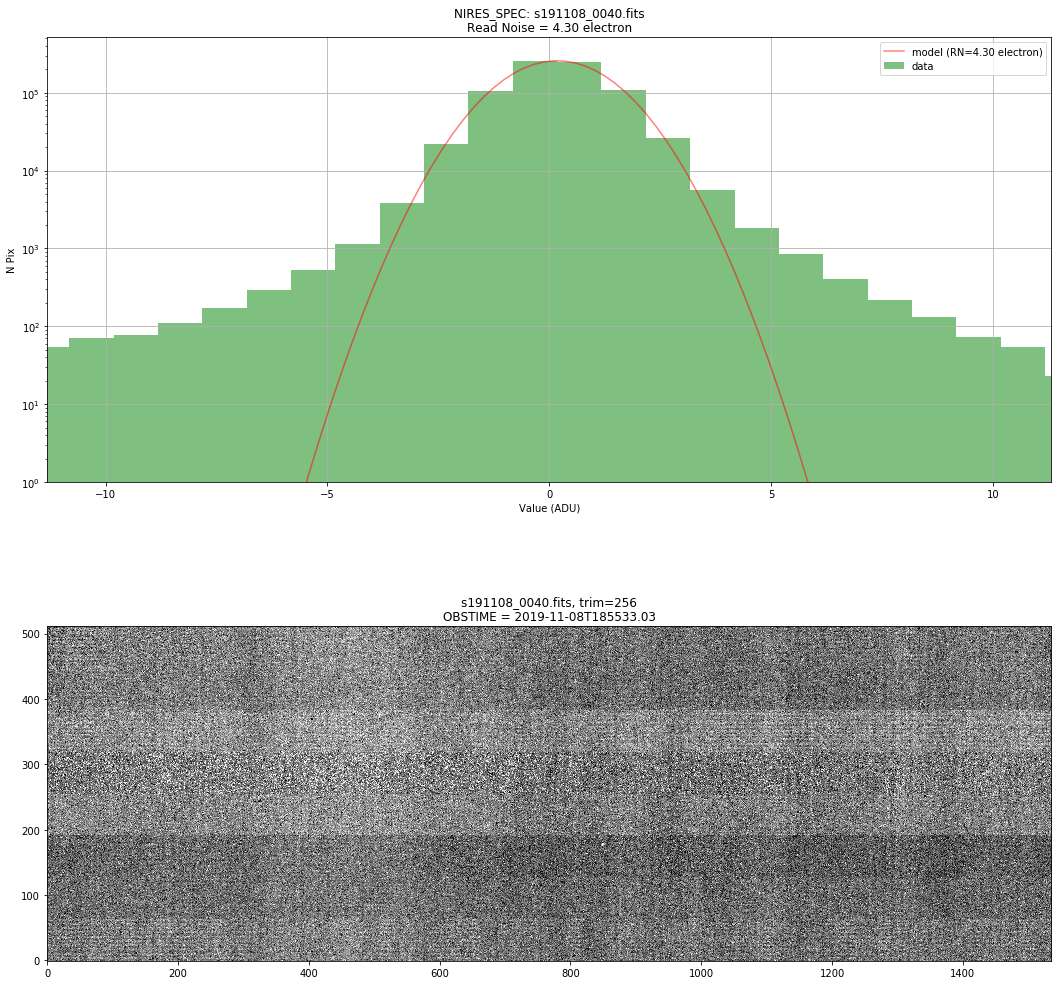

In [6]:
RNmcds = analysis.determine_read_noise(kdl_mcds, plot=True, trim=256, gain=nominal_gain)
for i,r in enumerate(RNmcds):
    print(f"Read Noise (ext {i}) = {r:.2f}")
del(kdl_mcds)